# Imports and definitions

In [1]:
%matplotlib inline

In [1]:
from so3g.hk import load_range
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [78]:
def get_temp_data(start, stop, channel):
    """
    get time, temperature data for a single LS372 channel

    inputs:
        start: dt.datetime() object, start of time range of interest in local time, no tzinfo
        stop: dt.datetime() object, start of time range of interest in local time, no tzinfo
        channel: int, LS372 channel (e.g. 1, 2, ...)
    returns:
        elapsed_time: array, time-time[0], in hours
        temp: array, temperature data, in kelvin
    """

    fields = [f'observatory.LSA2S5J.feeds.temperatures.Channel_0{channel}_T']
    data = load_range(start, stop, fields, data_dir='/data/')
    time = data[f'observatory.LSA2S5J.feeds.temperatures.Channel_0{channel}_T'][0]
    temp = data[f'observatory.LSA2S5J.feeds.temperatures.Channel_0{channel}_T'][1]
    elapsed_time = (time-time[0])/60./60.
    return elapsed_time, temp

In [82]:
def plot_temp_data(elapsed_times, temps, labels):
    """
    plot temperature data
    
    inputs:
        elapsed_times: list of elapsed_time arrays
        temps: list of temp arrays
        labels: list of plot labels
    """
    
    lines = ['solid', 'dotted', 'dashed', 'dashdot']
    for i in range(len(elapsed_times)):
        plt.plot(elapsed_times[i], temps[i], label=labels[i], ls=lines[i])
    plt.xlabel('Elapsed time (hr)')
    plt.ylabel('Temperature (K)')
    plt.legend()
    return

In [83]:
def get_pressure_data(start, stop, channel):
    """
    get time, pressure data for a single BF gauge
    
    inputs:
        start: dt.datetime() object, start of time range of interest in local time, no tzinfo
        stop: dt.datetime() object, start of time range of interest in local time, no tzinfo
        channel: int, BF pressure gauge number (e.g. 1, 2, ...)
    returns:
        elapsed_time: array, time-time[0], in hours
        pressure: array, pressure data, in mbar
    """
    fields = [f'observatory.cryo-bluefors.feeds.bluefors.pressure_ch{channel}']
    data = load_range(start, stop, fields, data_dir='/data/')
    time = data[f'observatory.cryo-bluefors.feeds.bluefors.pressure_ch{channel}'][0]
    pressure = data[f'observatory.cryo-bluefors.feeds.bluefors.pressure_ch{channel}'][1]
    elapsed_time = (time-time[0])/60./60.
    return elapsed_time, pressure

In [84]:
def plot_pressure_data(elapsed_times, pressures, labels):
    """
    plot pressure data
    
    inputs:
        elapsed_times: list of elapsed_time arrays
        pressures: list of pressure arrays
        labels: list of plot labels
    """
    
    lines = ['solid', 'dotted', 'dashed', 'dashdot']
    for i in range(len(elapsed_times)):
        plt.plot(elapsed_times[i], pressures[i], label=labels[i], ls=lines[i])
    plt.xlabel('Elapsed time (hr)')
    plt.ylabel('Pressure (mbar)')
    plt.legend()
    return

# Plot Temperature Curves

Use this cell to generate plots of temperature vs. elapsed time for one thermometer.

`starts` = `dt.datetime` object(s) with the desired start time(s)

`stops` = `dt.datetime` object(s) with the desired stop time(s)

There are a few different ways you can define `stops`:

1. First method: compare a specific time range from one cooldown curve to an equivalent time range of other cooldown curves. This is probably most useful when you are in the middle of cooling down and want to see if things are progressing at the same rate as previous cooldowns. You can define the first `stop` time to be either the current time, or a specific time using `dt.datetime()`
2. Second method: manually define all stop times as `dt.datetimes()`
3. Third method: see X hours/minutes/days/etc. of all curves, defined from the start times.

Text(0.5, 1.0, 'Temperature Channel 6')

/home/ocs/ocs_venv/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/ocs/ocs_venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


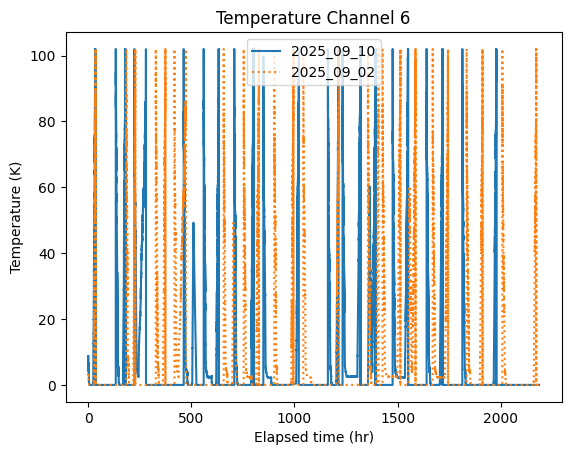

In [6]:
# pick the channel you want to plot
# 1 = 40K, 2 = 4K, 5 = Still, 6 = MXC
channel = 6

# pick the start times for all curves (format is Y, M, D, H, M) (can pull these from logs or grafana)
starts = [dt.datetime(2025, 9, 10, 13, 57), dt.datetime(2025, 9, 2, 12, 0)]

# if you have a particular range in mind for one curve and want all the other curves to be the same length
# this is probably most useful when you are in the middle of cooling down
stops = [dt.datetime.now()] # you pick the stop time for the first curve (e.g., the current time, or can define as a dt.datetime())
for i in range(1, len(starts)):
    stops.append(starts[i]+(stops[0]-starts[0])) # get an equivalent range of time for the other curves

# # if you want to define each stop time individually, you can set them just like you set starts
# stops = [dt.datetime(2025, 9, 9, 16, 47), dt.datetime(2025, 8, 29, 13, 50), dt.datetime(2025, 8, 12, 7, 39)]

# # if you want to just see X hours of data for all curves, you can add a constant offset
# # can also use "days", "minutes", "seconds" etc.
# stops = [start + dt.timedelta(hours=5) for start in starts]

labels = [starts[i].strftime(format="%Y_%m_%d") for i in range(len(starts))]
times = []
temps = []
for i in range(len(starts)):
    t, T = get_temp_data(starts[i], stops[i], channel=channel)
    times.append(t)
    temps.append(T)
plot_temp_data(times, temps, labels)
plt.title(f'Temperature Channel {channel}')

In [85]:
def plot_temp_channel(channel, starts, stops):
    """
    shortcut for plotting temperature channel plots
    """
    
    labels = [starts[i].strftime(format="%Y_%m_%d") for i in range(len(starts))]
    times = []
    temps = []
    for i in range(len(starts)):
        t, T = get_temp_data(starts[i], stops[i], channel=channel)
        times.append(t)
        temps.append(T)
    plot_temp_data(times, temps, labels)
    plt.title(f'Temperature Channel {channel}')

In [71]:
starts = [dt.datetime(2025, 11, 17, 12, 42), 
          dt.datetime(2025, 11, 10, 15, 45), 
          dt.datetime(2025, 11, 5, 20, 50), 
          dt.datetime(2025, 10, 31, 14, 47)]

stops = [start + dt.timedelta(hours=24) for start in starts]

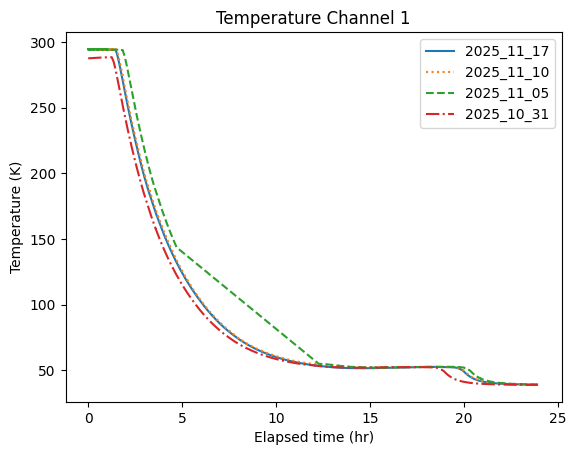

In [73]:
plot_temp_channel(1, starts, stops)

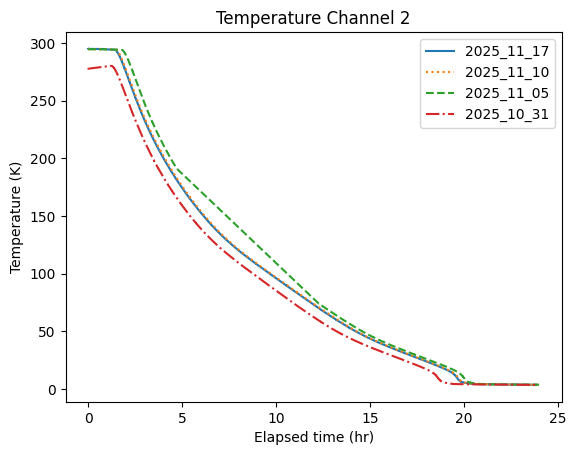

In [74]:
plot_temp_channel(2, starts, stops)

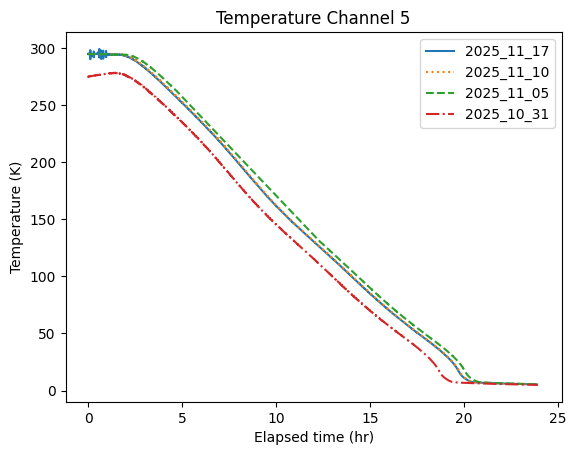

In [75]:
plot_temp_channel(5, starts, stops)

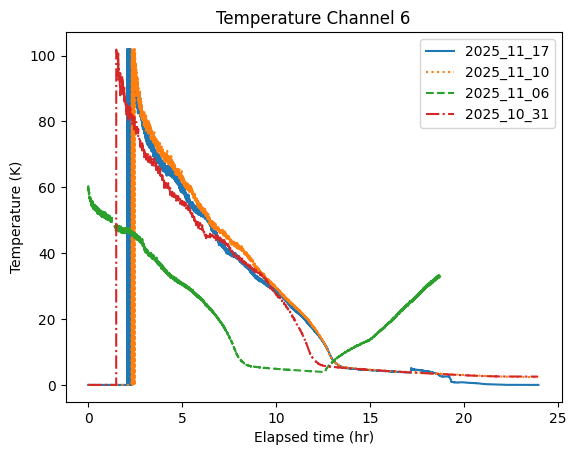

In [77]:
#channel 6 temperature drop starts ~7/8 hours after cooldown starts (temp out of range)

starts6 = [start + dt.timedelta(hours=7) for start in starts]
stops6 = [start + dt.timedelta(hours=24) for start in starts6]

plot_temp_channel(6, starts6, stops6)

# Plot Pressure Curves

Same as for temperature curves! Note you may want to toggle log scaling on the y-axis if the range you are looking at covers a big jump in pressure (e.g. pumping out the cryostat)

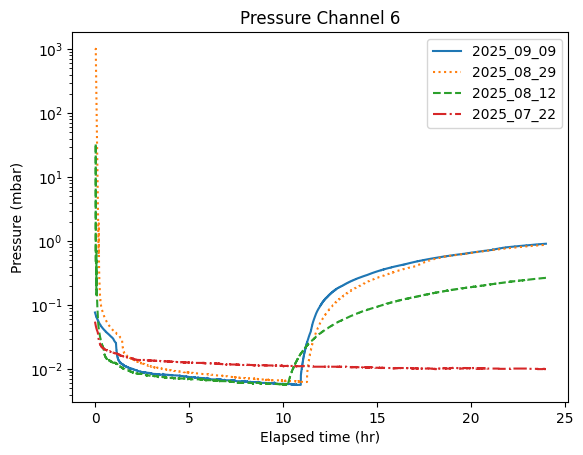

In [44]:
# pick the channel you want to plot
# 1 = vacuum can, 2 = turbo volume, 3 = condensing line, 4 = condensing backpressure valve, 5 = mix chamber, 6 = service manifold
channel = 6

# pick the start times for all curves (format is Y, M, D, H, M) (can pull these from logs or grafana)
starts = [dt.datetime(2025, 9, 9, 16, 47), dt.datetime(2025, 8, 29, 13, 50), dt.datetime(2025, 8, 12, 7, 39), dt.datetime(2025, 7, 22, 9, 47)]

# if you have a particular range in mind for one curve and want all the other curves to be the same length
# this is probably most useful when you are in the middle of cooling down
#stops = [dt.datetime.now()] # you pick the stop time for the first curve (e.g., the current time, or can define as a dt.datetime())
#for i in range(1, len(starts)):
    #stops.append(starts[i]+(stops[0]-starts[0])) # get an equivalent range of time for the other curves

# # if you want to define each stop time individually, you can set them just like you set starts
# stops = [dt.datetime(2025, 9, 9, 16, 47), dt.datetime(2025, 8, 29, 13, 50), dt.datetime(2025, 8, 12, 7, 39)]

# # if you want to just see X hours of data for all curves, you can add a constant offset
# # can also use "days", "minutes", "seconds" etc.
stops = [start + dt.timedelta(hours=24) for start in starts]

labels = [starts[i].strftime(format="%Y_%m_%d") for i in range(len(starts))]
times = []
pressures = []
for i in range(len(starts)):
    t, p = get_pressure_data(starts[i], stops[i], channel=channel)
    times.append(t)
    pressures.append(p)
plot_pressure_data(times, pressures, labels)
plt.title(f'Pressure Channel {channel}')

plt.yscale('log') # useful if viewing large pressure ranges

In [118]:
def plot_pressure_channel(channel, starts, stops):
    """
    shortcut for pressure plots
    """
    labels = [starts[i].strftime(format="%Y_%m_%d") for i in range(len(starts))]
    times = []
    pressures = []
    for i in range(len(starts)):
        t, p = get_pressure_data(starts[i], stops[i], channel=channel)
        times.append(t)
        pressures.append(p)
    plot_pressure_data(times, pressures, labels)
    plt.title(f'Pressure Channel {channel}')
    plt.yscale('log') # useful if viewing large pressure ranges

In [119]:
starts_p = [dt.datetime(2025, 11, 18, 11, 00), 
          dt.datetime(2025, 10, 29, 10, 00), 
          dt.datetime(2025, 10, 5, 10, 00)]

stops_p = [start + dt.timedelta(hours=72) for start in starts_p]

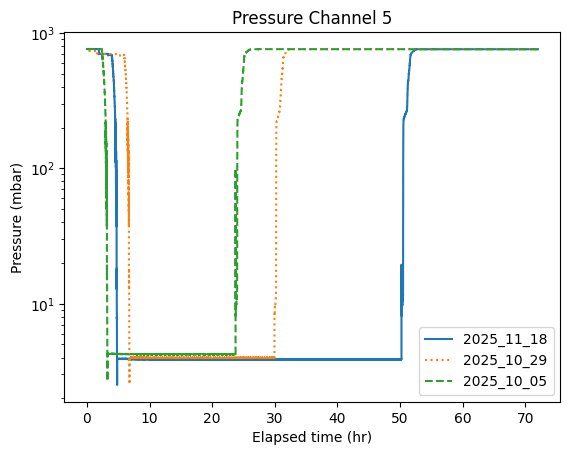

In [120]:
#Observe Mixtank and see if everything is conserved from cooldown to cooldown

plot_pressure_channel(5, starts_p, stops_p)